## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [219]:
pd.reset_option('all')

/var/folders/23/29dm_wdd3v56qd1vnzv031hm0000gn/T/ipykernel_12459/2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/23/29dm_wdd3v56qd1vnzv031hm0000gn/T/ipykernel_12459/2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [221]:
%reset -f

In [223]:
print(globals().keys())

dict_keys(['__name__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_i', '_ii', '_iii', '_i222', 'json', 'getpass', 'hashlib', 'import_pandas_safely', '__pandas', 'is_data_frame', 'dataframe_columns', 'dtypes_str', 'dataframe_hash', 'get_dataframes', '_', '__', '___', '_222', '_i223'])


In [225]:
from IPython import get_ipython
get_ipython().magic('reset -f')

/var/folders/23/29dm_wdd3v56qd1vnzv031hm0000gn/T/ipykernel_12459/2165308485.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -f')


In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [230]:
diabetes_data = pd.read_csv('../data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [233]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [236]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [239]:
diabetes_data.iloc[:, [1,2,3,5]] = diabetes_data.iloc[:,[1,2,3,4,5]].replace(0, np.nan)


/var/folders/23/29dm_wdd3v56qd1vnzv031hm0000gn/T/ipykernel_12459/858885900.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  diabetes_data.iloc[:, [1,2,3,5]] = diabetes_data.iloc[:,[1,2,3,4,5]].replace(0, np.nan)
/var/folders/23/29dm_wdd3v56qd1vnzv031hm0000gn/T/ipykernel_12459/858885900.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64' has dtype incompatible with int64, please explicitly cas

In [241]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       394 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


**<font color='teal'> Plot histograms of each column. </font>**

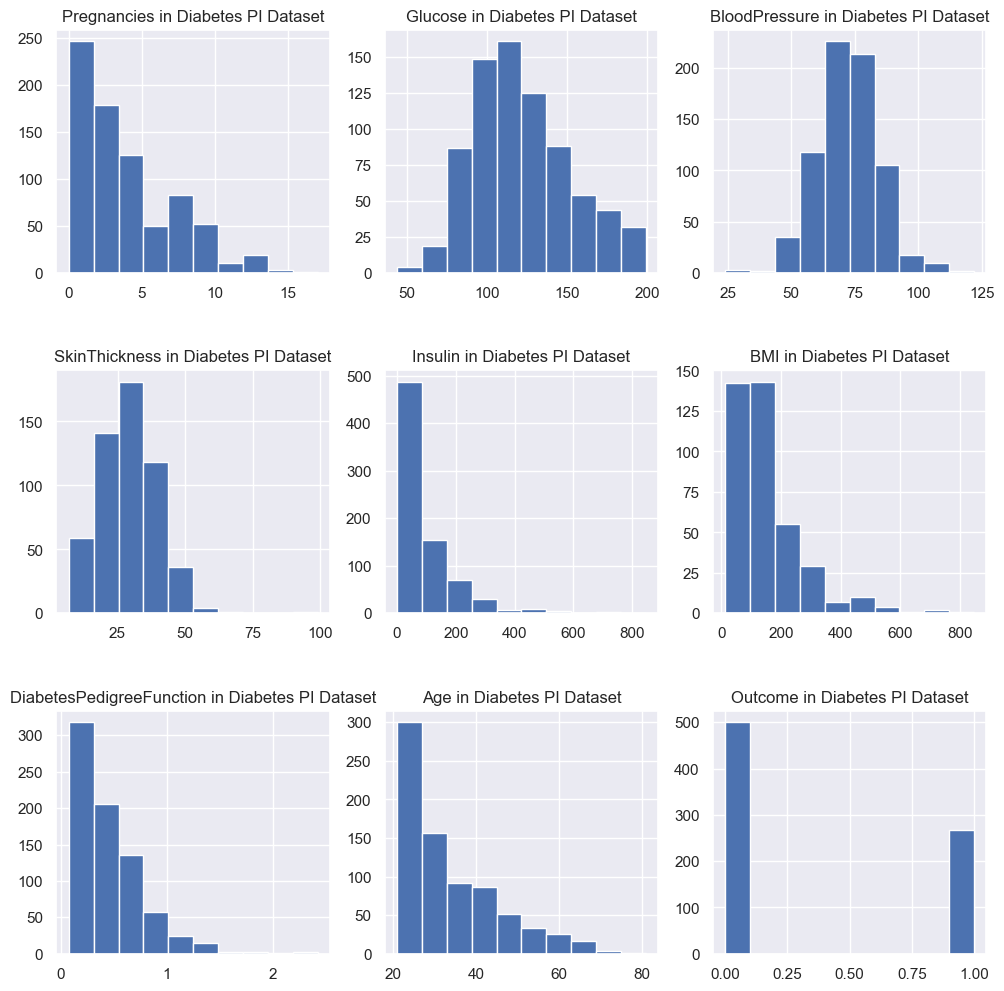

In [244]:
import matplotlib.pyplot as plt

#plt.hist(diabetes_data.iloc[:,1])
#plt.hist(diabetes_data.iloc[:,2])
#plt.show()
#plt.show()


#num_columns = diabetes_data.shape[1]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

axes = axes.flatten()

for i, col in enumerate(diabetes_data.columns):
    axes[i].hist(diabetes_data[col])
    axes[i].set_title(f'{col} in Diabetes PI Dataset')

plt.subplots_adjust(hspace=0.4) 

In [245]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       394 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


#### Replace the zeros with mean and median values.

In [249]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

/var/folders/23/29dm_wdd3v56qd1vnzv031hm0000gn/T/ipykernel_12459/2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
/var/folders/23/29dm_wdd3v56qd1vnzv031hm0000gn/T/ipykernel_12459/2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [251]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

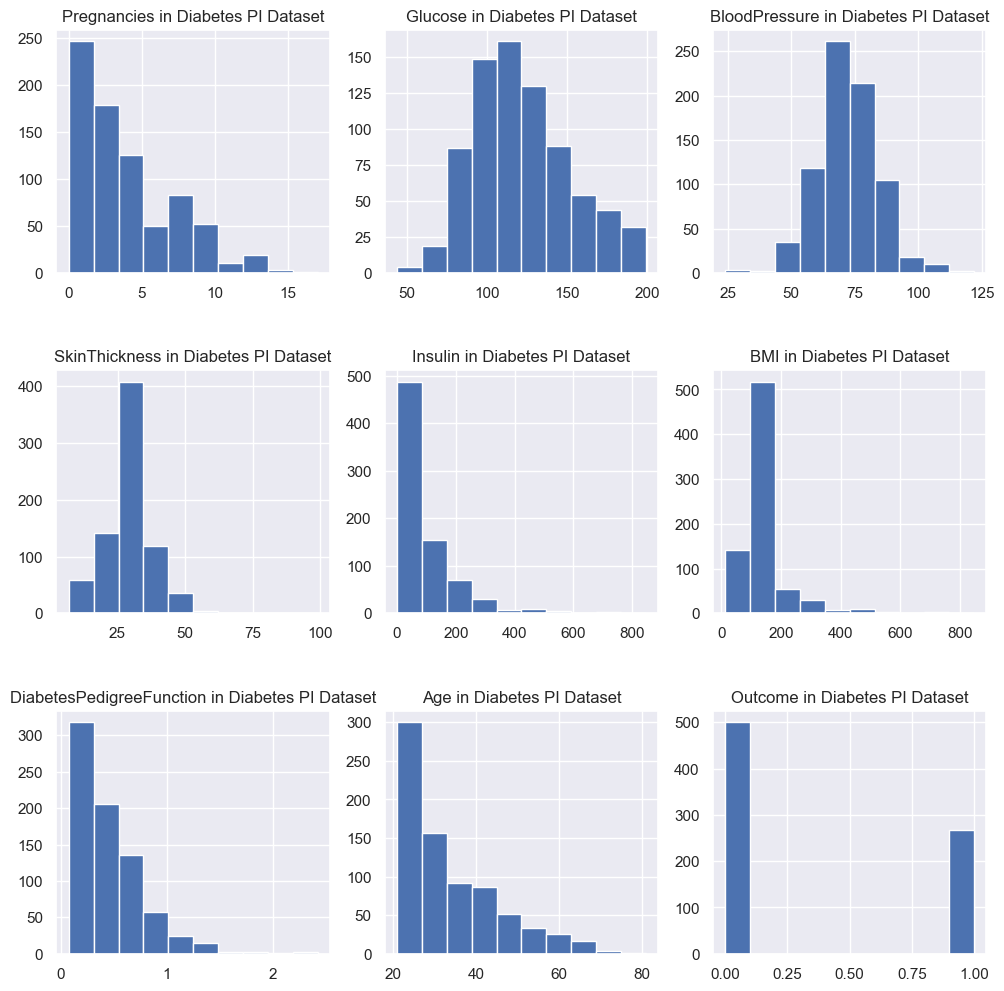

In [254]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

axes = axes.flatten()

for i, col in enumerate(diabetes_data.columns):
    axes[i].hist(diabetes_data[col])
    axes[i].set_title(f'{col} in Diabetes PI Dataset')

plt.subplots_adjust(hspace=0.4) 

#### Plot the correlation matrix heatmap

Correlation between various features


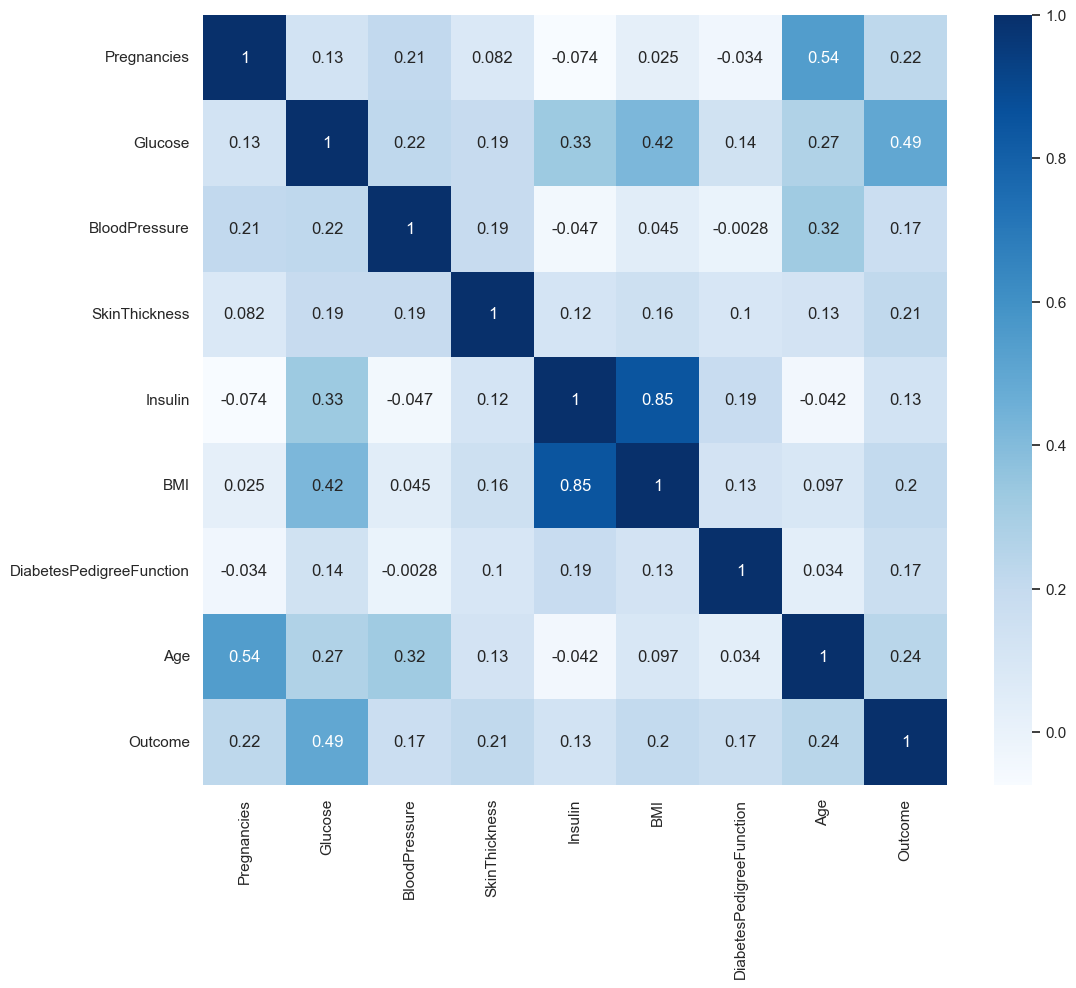

In [257]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [322]:
y = diabetes_data['Outcome']
X = diabetes_data.drop('Outcome', axis=1)




**<font color='teal'> Create a 70/30 train and test split. </font>**

In [325]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                train_size = 0.70,
                                                random_state = 42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [329]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_training_set = scaler.fit_transform(X_train)

scaled_training_diabetes_data = pd.DataFrame(scaled_training_set, columns=X_train.columns)

#We will scale the test set using the fit from the training set
scaled_test_set = scaler.transform(X_test)

scaled_test_diabetes_data = pd.DataFrame(scaled_test_set, columns=X_test.columns)

scaled_training_diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.836294,-0.896108,-1.004400,-1.269545,-0.189732,-0.956993,-0.614216,-0.948610
1,0.390728,-0.563997,-0.020266,0.029693,2.130203,2.136797,-0.909738,-0.434667
2,-1.143050,0.432336,-0.348311,1.565156,1.478536,1.267755,-0.306991,-0.777296
3,0.083972,0.299491,-0.348311,-0.915207,0.748669,0.294428,-0.906812,-0.434667
4,-0.836294,-0.630419,-3.464737,1.092706,0.027491,-0.667312,-0.839515,-0.006380


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [332]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [335]:
print(f'Train Scores: {train_scores}')
print(f'Test Scores: {test_scores}')

Train Scores: [1.0, 0.8324022346368715, 0.8286778398510242, 0.7988826815642458, 0.7970204841713222, 0.7858472998137802, 0.7932960893854749, 0.7821229050279329, 0.770949720670391]
Test Scores: [0.6623376623376623, 0.70995670995671, 0.6666666666666666, 0.6666666666666666, 0.6753246753246753, 0.670995670995671, 0.658008658008658, 0.6796536796536796, 0.670995670995671]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [338]:
best_k_train = np.argmax(train_scores) + 1
print(f'Best KNN Under Training Conditions: {best_k_train}')

Best KNN Under Training Conditions: 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [341]:
best_k_test = np.argmax(test_scores) + 1
print(f'Best KNN Under Testing Conditions: {best_k_test}')

Best KNN Under Testing Conditions: 2


Plot the train and test model performance by number of neighbors.

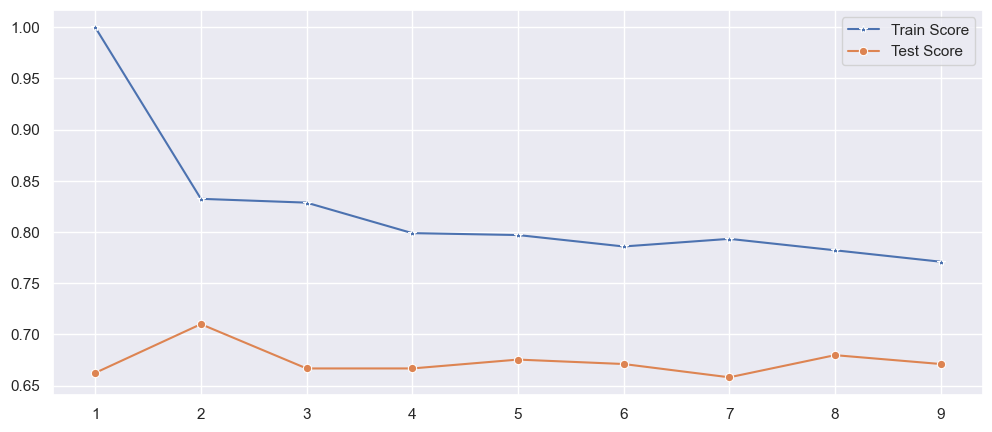

In [347]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [356]:
print('By Visual Observation the Best KNN Value is 8')

By Visual Observation the Best KNN Value is 8


In [349]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [364]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, knn.predict(X_test))

array([[114,  37],
       [ 39,  41]])

**<font color='teal'> Print the classification report </font>**

In [410]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: ', precision_score(y_test, knn.predict(X_test)))
print('Recall: ', recall_score(y_test, knn.predict(X_test)))
print('F1 Score: ', f1_score(y_test, knn.predict(X_test)))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [368]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [370]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7409387997623291
Best Parameters: {'n_neighbors': 45}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [466]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

#X_train.columns = X_train.columns.astype(str)
#X_test.columns = X_test.columns.astype(str)

param_grid = {
    'n_estimators': [5, 10, 50, 100, 125, 150, 200, 500]  
}

rf = RandomForestClassifier(max_depth=None, n_jobs=1)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

start = time.time()
grid_search.fit(X_train, y_train)  
end = time.time()
fit_time = end - start

best_rf_model = grid_search.best_estimator_
print(f'Best estimators: {grid_search.best_params_["n_estimators"]}')

start = time.time()
y_pred = rf_model.predict(X_test)  
end = time.time()
pred_time = end - start

from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision: ',precision_score(y_test, y_pred, average='binary'))
print('Recall: ', recall_score(y_test, y_pred, average='binary'))
print('F1 Score: ', f1_score(y_test, y_pred, average='binary' ))
print('Accuarcy:', accuracy_score(y_test, y_pred))

print('')
print('Precision with Average=macro: ',precision_score(y_test, y_pred, average='macro'))
print('Recall with Average=macro: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score with Average=macro: ', f1_score(y_test, y_pred, average='macro'))
print('Accuarcy:', accuracy_score(y_test, y_pred))

print('')
print('Precision with Average=micro: ',precision_score(y_test, y_pred, average='micro'))
print('Recall with Average=micro: ', recall_score(y_test, y_pred, average='micro'))
print('F1 Score with Average=micro: ', f1_score(y_test, y_pred, average='micro'))
print('Accuarcy:', accuracy_score(y_test, y_pred))

print('')
print('Precision with Average=weighted: ',precision_score(y_test, y_pred, average='weighted'))
print('Recall with Average=wighted: ', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score with Average=weighted: ', f1_score(y_test, y_pred, average='weighted'))
print('Accuarcy:', accuracy_score(y_test, y_pred))

print('')
print('Fit time: {:.4f} seconds / Predict time: {:.4f} seconds'.format(fit_time, pred_time))


Best estimators: 50
Precision:  0.64
Recall:  0.6
F1 Score:  0.6193548387096774
Accuarcy: 0.7445887445887446

Precision with Average=macro:  0.7174358974358974
Recall with Average=macro:  0.7105960264900661
F1 Score with Average=macro:  0.7135862141431124
Accuarcy: 0.7445887445887446

Precision with Average=micro:  0.7445887445887446
Recall with Average=micro:  0.7445887445887446
F1 Score with Average=micro:  0.7445887445887446
Accuarcy: 0.7445887445887446

Precision with Average=weighted:  0.7412365412365413
Recall with Average=wighted:  0.7445887445887446
F1 Score with Average=weighted:  0.7425491044278477
Accuarcy: 0.7445887445887446

Fit time: 1.6262 seconds / Predict time: 0.0026 seconds
